# Data Loading and Cleaning

Loads and examines the initial structure of the datasets required.

In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.colors import TwoSlopeNorm, LinearSegmentedColormap

In [2]:
# Load Data
# df_adjusted = pd.read_csv('../data/combined_data_season_adjusted.csv')
# df_not_adjusted = pd.read_csv('../data/combined_data_season_not_adjusted.csv')
# categories = pd.read_csv('../data/code_categories.csv')

In [3]:
# Load Data
df_adjusted = pd.read_csv('../data/MRTS_adjusted.csv')
df_not_adjusted = pd.read_csv('../data/MRTS_not_adjusted.csv')
categories = pd.read_csv('../data/mrts_code_categories.csv')

- **`df_adjusted` (*combined_data_season_adjusted*)**: Contains the main dataset with seasonally adjusted sales data for retail and food services from 2017–2023.
- 
**`df_not_adjusted` (*combined_data_season_not_adjusted*)**: Contains the main dataset with raw sales data for retail and food services from 2017–2023.
  
- **`categories` (*code_categories*)**: Provides a mapping of category codes to descriptive names, enabling a better understanding of each retail and food service segment.


In [4]:
df_adjusted.head()

,cell_value,time_slot_id,data_type_code,category_code,error_data,seasonally_adj,data_type_code.1,time,us
0,91596,0,SM,441X,no,yes,SM,2017-01,1
1,91088,0,SM,441X,no,yes,SM,2017-02,1
2,89067,0,SM,441X,no,yes,SM,2017-03,1
3,89571,0,SM,441X,no,yes,SM,2017-04,1
4,90043,0,SM,441X,no,yes,SM,2017-05,1


In [5]:
df_not_adjusted.head()

,cell_value,time_slot_id,data_type_code,category_code,error_data,seasonally_adj,data_type_code.1,time,us
0,74647,0,SM,4411,no,no,SM,2017-01,1
1,77728,0,SM,4411,no,no,SM,2017-02,1
2,91143,0,SM,4411,no,no,SM,2017-03,1
3,82286,0,SM,4411,no,no,SM,2017-04,1
4,89634,0,SM,4411,no,no,SM,2017-05,1


In [6]:
categories.head()

,category_code,category_name,high_level_category,is_subset
0,44X72,Retail Trade and Food Services,Retail Trade and Food Services,False
1,44Y72,"Retail Trade and Food Services, ex Auto",Retail Trade and Food Services,True
2,44Z72,"Retail Trade and Food Services, ex Gas",Retail Trade and Food Services,True
3,44W72,"Retail Trade and Food Services, ex Auto and Gas",Retail Trade and Food Services,True
4,44000,Retail Trade,Retail Trade and Food Services,True


In [7]:
df_adjusted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cell_value        3192 non-null   object
 1   time_slot_id      3192 non-null   int64 
 2   data_type_code    3192 non-null   object
 3   category_code     3192 non-null   object
 4   error_data        3192 non-null   object
 5   seasonally_adj    3192 non-null   object
 6   data_type_code.1  3192 non-null   object
 7   time              3192 non-null   object
 8   us                3192 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 224.6+ KB


In [8]:
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category_code        65 non-null     object
 1   category_name        65 non-null     object
 2   high_level_category  65 non-null     object
 3   is_subset            65 non-null     bool  
dtypes: bool(1), object(3)
memory usage: 1.7+ KB


In [9]:
df_adjusted.columns

Index(['cell_value', 'time_slot_id', 'data_type_code', 'category_code',
       'error_data', 'seasonally_adj', 'data_type_code.1', 'time', 'us'],
      dtype='object')

In [10]:
pd.options.display.float_format = '{:.2f}'.format

As the dataset contains no `null` values, we proceed to examine the unique values in each column to understand the variability and structure of the data.

In [11]:
for column in df_adjusted.columns:
    print(f"Column: {column}")
    print(f"Unique values: {df_adjusted[column].unique()}")
    print(f"Number of unique values: {df_adjusted[column].nunique()}\n")

for column in categories.columns:
    print(f"Column: {column}")
    print(f"Unique values: {categories[column].unique()}")
    print(f"Number of unique values: {categories[column].nunique()}\n")

Column: cell_value
Unique values: ['91596' '91088' '89067' ... '28784' '2528' '2737']
Number of unique values: 3044

Column: time_slot_id
Unique values: [0]
Number of unique values: 1

Column: data_type_code
Unique values: ['SM']
Number of unique values: 1

Column: category_code
Unique values: ['441X' '4400A' '4413' '4400C' '44000' '441' '4423X' '444' '4441' '4451'
 '442' '446' '443' '445' '4453' '4481' '44812' '44811' '44611' '448' '447'
 '722' '451' '44W72' '45291' '452' '44Y72' '45299' '44X72' '454' '453'
 '4541' '4482' '44831' '4521E' '45431' '44Z72' '4529']
Number of unique values: 38

Column: error_data
Unique values: ['no']
Number of unique values: 1

Column: seasonally_adj
Unique values: ['yes']
Number of unique values: 1

Column: data_type_code.1
Unique values: ['SM']
Number of unique values: 1

Column: time
Unique values: ['2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06' '2017-07'
 '2017-08' '2017-09' '2017-10' '2017-11' '2017-12' '2018-01' '2018-02'
 '2018-03' '20

Convert data types to appropriate types

 - `time` to `Datetime` format for easier analysis.

In [12]:
df_adjusted['time'] = pd.to_datetime(df_adjusted['time'], format='%Y-%m')
df_not_adjusted['time'] = pd.to_datetime(df_not_adjusted['time'], format='%Y-%m')
df_adjusted = df_adjusted.sort_values(by='time', ascending=True)
df_not_adjusted = df_not_adjusted.sort_values(by='time', ascending=True)

- `cell_value`'s type `string` to `integer` so it represents monthly sales

In [13]:
df_adjusted["monthly_sales"] = pd.to_numeric(df_adjusted["cell_value"], errors='coerce')  # Convert to numeric, invalid values become NaN
df_not_adjusted["monthly_sales"] = pd.to_numeric(df_not_adjusted["cell_value"], errors='coerce')  
non_convertible_values = df_adjusted[df_adjusted["monthly_sales"].isna()]["cell_value"].unique() + df_adjusted[df_adjusted["monthly_sales"].isna()]["cell_value"].unique()

print("Adjusted Non-convertible values:", non_convertible_values, "Not Adjusted Non-convertible values:", non_convertible_values)

Adjusted Non-convertible values: ['(S)(S)'] Not Adjusted Non-convertible values: ['(S)(S)']


Since `(S)` values are suppressed, we will keep this as `null`

In [14]:
num_null_adjusted = df_adjusted["monthly_sales"].isna().sum()
num_null_not_adjusted = df_not_adjusted["monthly_sales"].isna().sum()

print(f"Adjusted Data Null Values: {num_null_adjusted}")
print(f"Not Adjusted Data Null Values: {num_null_not_adjusted}")

# Distribution of rows with (S) values by category
s_values_distribution_adjusted = df_adjusted[df_adjusted["monthly_sales"].isna()]["category_code"].value_counts()
s_values_distribution_not_adjusted = df_not_adjusted[df_not_adjusted["monthly_sales"].isna()]["category_code"].value_counts()

print("Adjusted Data Distribution of (S) Values by Category:")
print(s_values_distribution_adjusted)

print("Not Adjusted Data Distribution of (S) Values by Category:")
print(s_values_distribution_not_adjusted)

Adjusted Data Null Values: 68
Not Adjusted Data Null Values: 345
Adjusted Data Distribution of (S) Values by Category:
category_code
44811    34
44831    34
Name: count, dtype: int64
Not Adjusted Data Distribution of (S) Values by Category:
category_code
44221     82
7224      70
722511    47
4422      39
442299    39
44811     34
44831     34
Name: count, dtype: int64


In [15]:
categories[categories['category_code'].isin(["44221", "7224", "722511", "4422", "442299", "44811", "44831"])]

,category_code,category_name,high_level_category,is_subset
16,4422,Home Furnishings Stores,Furniture and Home Furnishings Stores,True
17,44221,Floor Covering Stores,Furniture and Home Furnishings Stores,True
18,442299,All Other Home Furnishings Stores,Furniture and Home Furnishings Stores,True
35,44811,Men's Clothing Stores,Clothing and Clothing Accessories Stores,True
40,44831,Jewelry Stores,Clothing and Clothing Accessories Stores,True
61,7224,Drinking Places,Food Services and Drinking Places,True
63,722511,Full Service Restaurants,Food Services and Drinking Places,True


As categories `Floor Covering Stores`, `Drinking Places`, and `Full Service Restaurants` have more than half of the availabe data as null, and there are more relevant categories remaining such as `Furniture, Home Furnishings, Electronics, and Appliance Stores` and `Food Services and Drinking Places`, we will be removing the categories. 

In [16]:
df_not_adjusted = df_not_adjusted[~df_not_adjusted['category_code'].isin(["44221", "7224", "722511"])]
df_adjusted = df_adjusted[~df_adjusted['category_code'].isin(["44221", "7224", "722511"])]

Rename column names for better interpretation.

In [17]:
df_adjusted = df_adjusted.rename(columns={'seasonally_adj': 'seasonally_adjusted'})
df_not_adjusted = df_not_adjusted.rename(columns={'seasonally_adj': 'seasonally_adjusted'})
df_adjusted['seasonally_adjusted'] = df_adjusted['seasonally_adjusted'].map({'yes': True, 'no': False})
df_not_adjusted['seasonally_adjusted'] = df_not_adjusted['seasonally_adjusted'].map({'yes': True, 'no': False})

In [18]:
df_not_adjusted ## MY CHECK

,cell_value,time_slot_id,data_type_code,category_code,error_data,seasonally_adjusted,data_type_code.1,time,us,monthly_sales
0,74647,0,SM,4411,no,False,SM,2017-01-01,1,74647.00
490,45834,0,SM,454,no,False,SM,2017-01-01,1,45834.00
496,336767,0,SM,44Y72,no,False,SM,2017-01-01,1,336767.00
518,2148,0,SM,4482,no,False,SM,2017-01-01,1,2148.00
158,52570,0,SM,4451,no,False,SM,2017-01-01,1,52570.00
...,...,...,...,...,...,...,...,...,...,...
4884,74366,0,SM,44511,no,False,SM,2023-12-01,1,74366.00
5332,586979,0,SM,44W72,no,False,SM,2023-12-01,1,586979.00
5121,92667,0,SM,452,no,False,SM,2023-12-01,1,92667.00
4472,3354,0,SM,44413,no,False,SM,2023-12-01,1,3354.00


Proceed to drop unnecessary columns.

In [19]:
df_adjusted = df_adjusted.drop(columns=['time_slot_id', 'us','data_type_code', 'data_type_code.1', 'cell_value', 'error_data'])
df_not_adjusted = df_not_adjusted.drop(columns=['time_slot_id', 'us','data_type_code', 'data_type_code.1', 'cell_value', 'error_data'])

Merge the main dataset with a mapping dataset (categories) using the `category_code` column. 

This step assigns descriptive names to each `category_code`, making the dataset more interpretable.

In [20]:
df_adjusted = df_adjusted.merge(categories, on='category_code', how='left')
df_not_adjusted = df_not_adjusted.merge(categories, on='category_code', how='left')

In [21]:
df_adjusted.head()

,category_code,seasonally_adjusted,time,monthly_sales,category_name,high_level_category,is_subset
0,441X,True,2017-01-01,91596.00,Auto and Other Motor Vehicles,Motor Vehicle and Parts Dealers,True
1,445,True,2017-01-01,59565.00,Food and Beverage Stores,Food and Beverage Stores,False
2,44X72,True,2017-01-01,473019.00,Retail Trade and Food Services,Retail Trade and Food Services,False
3,452,True,2017-01-01,57644.00,General Merchandise Stores,General Merchandise Stores,False
4,451,True,2017-01-01,7216.00,"Sporting Goods, Hobby, Musical Instrument, and...","Sporting Goods, Hobby, Musical Instrument, and...",False


In [22]:
output_directory = "../data/"

# Export DataFrames to CSV files
# sm_df_adjusted.to_csv(f"{output_directory}sm_df_adjusted.csv", index=False)
# esm_df_adjusted.to_csv(f"{output_directory}esm_df_adjusted.csv", index=False)
# sm_df_not_adjusted.to_csv(f"{output_directory}sm_df_not_adjusted.csv", index=False)
# esm_df_not_adjusted.to_csv(f"{output_directory}esm_df_not_adjusted.csv", index=False)

# Visualizations

In [23]:
df_adjusted[df_adjusted['category_name'] == 'GAFO'] #MY CHECK

,category_code,seasonally_adjusted,time,monthly_sales,category_name,high_level_category,is_subset
6,4400C,True,2017-01-01,106672.00,GAFO,Retail Trade and Food Services,True
72,4400C,True,2017-02-01,105441.00,GAFO,Retail Trade and Food Services,True
80,4400C,True,2017-03-01,106088.00,GAFO,Retail Trade and Food Services,True
150,4400C,True,2017-04-01,106155.00,GAFO,Retail Trade and Food Services,True
169,4400C,True,2017-05-01,104844.00,GAFO,Retail Trade and Food Services,True
...,...,...,...,...,...,...,...
3035,4400C,True,2023-08-01,129850.00,GAFO,Retail Trade and Food Services,True
3076,4400C,True,2023-09-01,129525.00,GAFO,Retail Trade and Food Services,True
3095,4400C,True,2023-10-01,129095.00,GAFO,Retail Trade and Food Services,True
3129,4400C,True,2023-11-01,129255.00,GAFO,Retail Trade and Food Services,True


In [24]:
sales_trends = df_adjusted.copy()
sales_trends['year'] = df_adjusted['time'].dt.year
yearly_sales_avg = sales_trends.groupby(['year', 'category_name', 'high_level_category'])['monthly_sales'].mean().reset_index()
yearly_sales_sum = sales_trends.groupby(['year', 'category_name', 'high_level_category', 'is_subset'])['monthly_sales'].sum().reset_index()
yearly_sales_sum['yoy_percentage'] = yearly_sales_sum.groupby('category_name')['monthly_sales'].pct_change() * 100
sales_avg = sales_trends.groupby(['category_name', 'is_subset','time'])['monthly_sales'].mean().reset_index()
sales_sum = sales_trends.groupby(['category_name'])['monthly_sales'].sum().reset_index()

In [25]:
sales_avg.sort_values(by=['monthly_sales'], ascending=False)

,category_name,is_subset,time,monthly_sales
2519,Retail Trade and Food Services,False,2023-12-01,703256.00
2516,Retail Trade and Food Services,False,2023-09-01,702109.00
2518,Retail Trade and Food Services,False,2023-11-01,700707.00
2517,Retail Trade and Food Services,False,2023-10-01,698956.00
2515,Retail Trade and Food Services,False,2023-08-01,696238.00
...,...,...,...,...
1927,Men's Clothing Stores,True,2023-08-01,NaN
1928,Men's Clothing Stores,True,2023-09-01,NaN
1929,Men's Clothing Stores,True,2023-10-01,NaN
1930,Men's Clothing Stores,True,2023-11-01,NaN


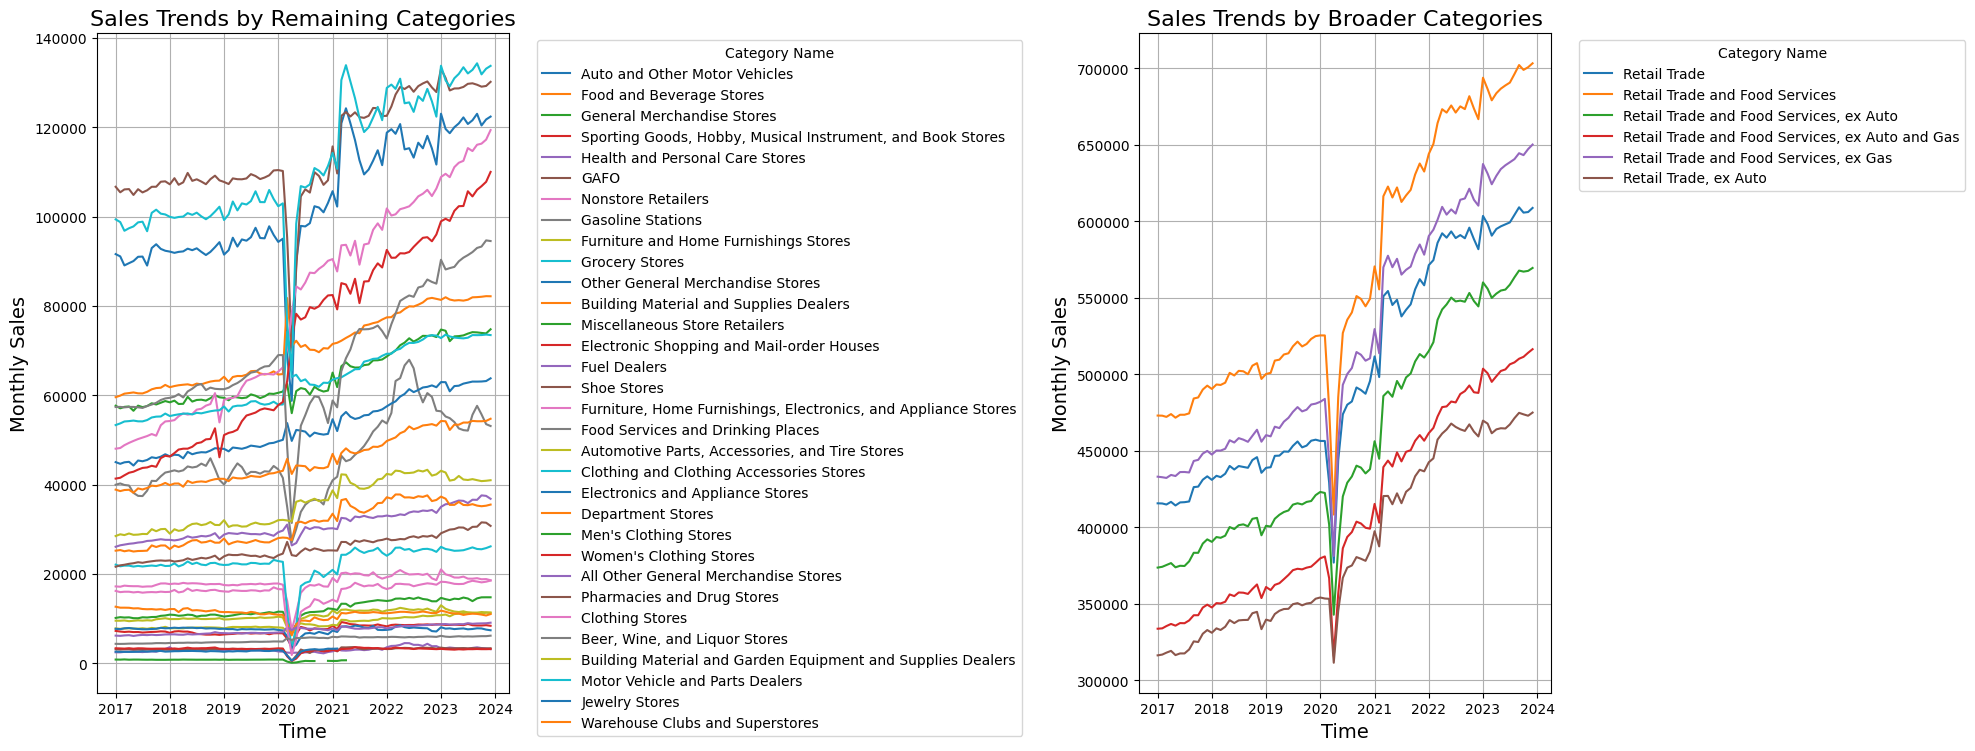

In [26]:
top_categories = ['Retail Trade and Food Services', 'Retail Trade and Food Services, ex Gas', 'Retail Trade', 
                  'Retail Trade and Food Services, ex Auto', 'Retail Trade and Food Services, ex Auto and Gas', 
                  'Retail Trade, ex Auto']
sales_trends_top = sales_avg[sales_avg['category_name'].isin(top_categories)]
remaining_categories = sales_avg[~sales_avg['category_name'].isin(top_categories)]['category_name']
sales_trends_remaining = sales_trends[sales_trends['category_name'].isin(remaining_categories)]
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
for category in sales_trends_remaining['category_name'].unique():
    category_data = sales_trends_remaining[sales_trends_remaining['category_name'] == category]
    plt.plot(category_data['time'], category_data['monthly_sales'], label=category)

plt.title('Sales Trends by Remaining Categories', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Monthly Sales', fontsize=14)
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(visible=True)

# Top 6 categories
plt.subplot(1, 2, 2)
for category in sales_trends_top['category_name'].unique():
    category_data = sales_trends_top[sales_trends_top['category_name'] == category]
    plt.plot(category_data['time'], category_data['monthly_sales'], label=category)

plt.title('Sales Trends by Broader Categories', fontsize=16)
plt.xlabel('Time', fontsize=14)
plt.ylabel('Monthly Sales', fontsize=14)
plt.legend(title='Category Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.grid(visible=True)

plt.tight_layout()
plt.show()


In [27]:
yearly_sales_sum

,year,category_name,high_level_category,is_subset,monthly_sales,yoy_percentage
0,2017,All Other General Merchandise Stores,Other General Merchandise Stores,True,75064.00,NaN
1,2017,Auto and Other Motor Vehicles,Motor Vehicle and Parts Dealers,True,1094315.00,NaN
2,2017,"Automotive Parts, Accessories, and Tire Stores",Motor Vehicle and Parts Dealers,True,93643.00,NaN
3,2017,"Beer, Wine, and Liquor Stores",Food and Beverage Stores,True,52671.00,NaN
4,2017,Building Material and Garden Equipment and Sup...,Building Material and Garden Equipment and Sup...,False,349987.00,NaN
...,...,...,...,...,...,...
261,2023,"Retail Trade, ex Auto",Retail Trade and Food Services,True,5627256.00,1.95
262,2023,Shoe Stores,Clothing and Clothing Accessories Stores,True,40077.00,0.36
263,2023,"Sporting Goods, Hobby, Musical Instrument, and...","Sporting Goods, Hobby, Musical Instrument, and...",False,102465.00,-0.30
264,2023,Warehouse Clubs and Superstores,Other General Merchandise Stores,True,646706.00,3.43


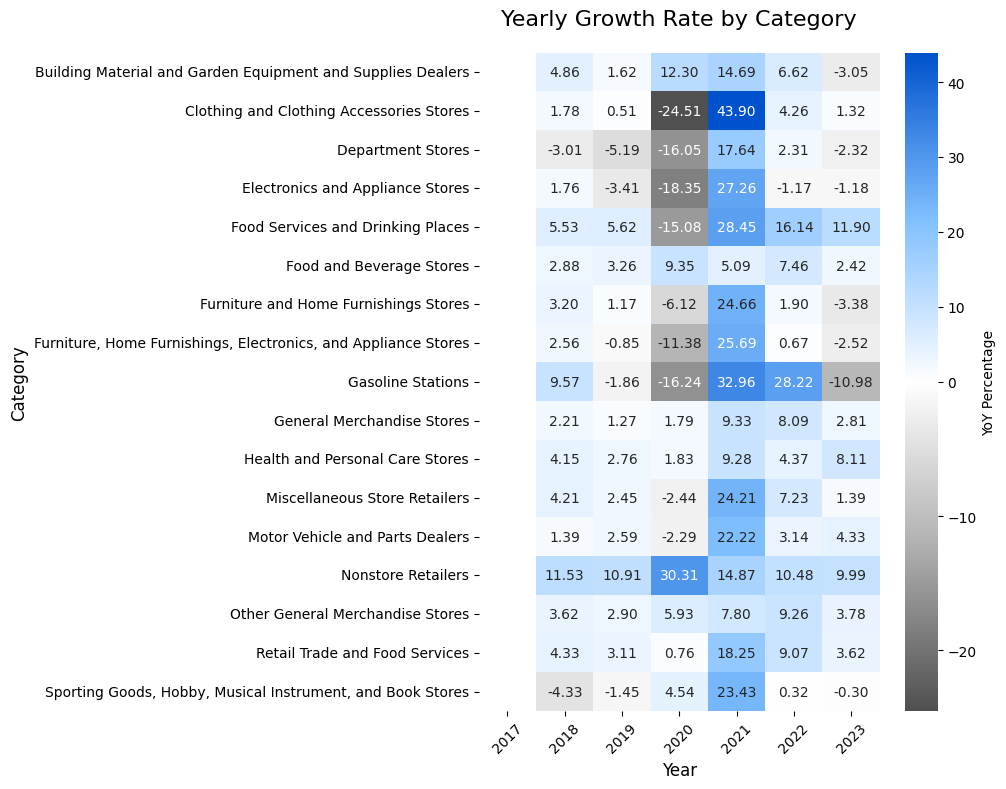

In [29]:
filtered_higher_cat_data  = yearly_sales_sum[yearly_sales_sum['is_subset'] == False]
heatmap_data = filtered_higher_cat_data.pivot(index='category_name', columns='year', values='yoy_percentage')

colors = ["#505050", "#b0b0b0", "#ffffff", "#80bfff", "#0052cc"]
custom_cmap = LinearSegmentedColormap.from_list("custom_diverging", colors)
heat_min = heatmap_data.min().min()
heat_max = heatmap_data.max().max() 

norm = TwoSlopeNorm(vmin=heat_min, vcenter=0, vmax=heat_max)

plt.figure(figsize=(10, 8))
sns.heatmap(
    heatmap_data, 
    cmap=custom_cmap, 
    norm=norm, 
    annot=True, 
    fmt=".2f", 
    cbar_kws={"label": "YoY Percentage"}
)
plt.title("Yearly Growth Rate by Category", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.set_palette()

In [ ]:
retail_result = seasonal_decompose(pivoted_retail, model='multiplicative', period=12)
retail_result.plot()
plt.suptitle('Retail Trade - Seasonal Decomposition', fontsize=16, y=1.02)
plt.show()

In [ ]:
result_food = seasonal_decompose(pivoted_food, model='multiplicative', period=12)
result_nonstore = seasonal_decompose(pivoted_nonstore, model='multiplicative', period=12)
result_gasoline = seasonal_decompose(pivoted_gasoline, model='multiplicative', period=12)
result_clothing = seasonal_decompose(pivoted_clothing_and_acc, model='multiplicative', period=12)

fig, axes = plt.subplots(4, 4, figsize=(18, 14), gridspec_kw={'hspace': 0.8, 'wspace': 0.3})

def plot_components(result, axes, row, category_name):
    components = ['observed', 'trend', 'seasonal', 'resid']
    colors = [["#275aab","#3b67ad","#5876a6","#7c8ca6"],["#8f3bb3","#985bb3","#a873bf","#ac8aba"],["#14b316","#37b839","#67b868","#8fcf90"],["#d97c2b","#d48642","#e39a5b","#dea36f"]]
    for col, component in enumerate(components):
        axes[row, col].plot(getattr(result, component), color=colors[row][col], linewidth=2)
        axes[row, col].set_title(f'{category_name} - {component.capitalize()}', fontsize=12)
        axes[row, col].set_xlabel('Time', fontsize=10)
        axes[row, col].set_ylabel(component.capitalize(), fontsize=10)
        axes[row, col].tick_params(axis='x', rotation=45, labelsize=9)
        axes[row, col].tick_params(axis='y', labelsize=9)

plot_components(result_food, axes, 0, 'Food Services and Drinking Places')
plot_components(result_nonstore, axes, 1, 'Nonstore Retailers')
plot_components(result_gasoline, axes, 2, 'Gasoline Stations')
plot_components(result_clothing, axes, 3, 'Clothing and Accessories Stores')

plt.show()